In [13]:
from rosbags.rosbag2 import Reader
# from rosbags.serde import deserialize_cdr
from rosbags.typesys import Stores, get_typestore
import matplotlib.pyplot as plt
# import numpy as np
# from scipy.signal import medfilt, butter, lfilter, freqz
from pathlib import Path


bag_file: Path = "/media/marco/USB DISK/app2_2024_10_02_1119_28"
topic_name: str = "/prop_sensors"

In [14]:
data = []
timestamps = []

# create reader instance and open for reading
with Reader(bag_file) as reader:
    # topic and msgtype information is available on .connections list
    for connection in reader.connections:
        print(connection.topic, connection.msgtype)
        
    # iterate over messages
    for connection, timestamp, rawdata in reader.messages():
        if connection.topic == topic_name:
            typestore = get_typestore(Stores.ROS2_HUMBLE)
            msg = typestore.deserialize_cdr(rawdata, connection.msgtype)
            # msg = deserialize_cdr(rawdata, connection.msgtype)
            timestamps.append(timestamp)
            data.append(msg.data)

wheel_position = [array[0] for array in data]   # [m]
wheel_velocity = [array[1] for array in data]   # [m/s]
drive_reference = [array[2] for array in data]  # [V]
drive_cmd = [array[3] for array in data]    # [V]
drive_pwm = [array[4] for array in data]
encoder = [array[5] for array in data]
# steering_angle = [array[6] for array in data] # APP5
control_mode = [array[7] for array in data]
# dt = [array[8] for array in data] # APP5
# dx = [array[9] for array in data] # APP5
imu_accel_x = [array[10] for array in data] # [m/s^2]
imu_accel_y = [array[11] for array in data] # [m/s^2]
imu_accel_z = [array[12] for array in data] # [m/s^2]
imu_gyro_x = [array[13] for array in data]  # [rad/s]
imu_gyro_y = [array[14] for array in data]  # [rad/s]
imu_gyro_z = [array[15] for array in data]  # [rad/s]
imu_mag_x = [array[16] for array in data]   # [uT] (microTelsa)
imu_mag_y = [array[17] for array in data]   # [uT]
imu_mag_z = [array[18] for array in data]   # [uT]

/prop_sensors std_msgs/msg/Float32MultiArray


In [15]:
# Convert timestamps to offset-based time vector (s)

offset = timestamps[0]
for i in range(0, len(timestamps)):
    timestamps[i] = (timestamps[i] - offset) / 1e9

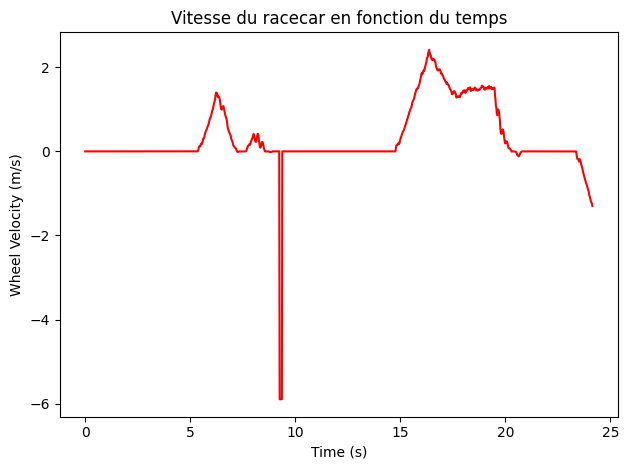

In [16]:
# Plot the (wheel) position with respect to time

fig1, ax1 = plt.subplots()
ax1.set_title("Vitesse du racecar en fonction du temps")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Wheel Velocity (m/s)")
ax1.plot(timestamps, wheel_velocity, '-r')
fig1.tight_layout()
plt.show()
